# 패키지 설치

In [ ]:
!pip install mySUNI

## 모듈 import

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from mySUNI import cds
from IPython.display import Image

## 데이터셋 로드

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## copy

DataFrame을 **복제**합니다. 복제한 DataFrame을 수정해도 **원본에는 영향을 미치지 않습니다.**

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`copy()`로 DataFrame을 복제합니다.

In [4]:
df_copy = df.copy()

id 값을 확인하면 두 DataFrame의 **메모리 주소가 다름**을 확인할 수 있습니다.

In [5]:
id(df), id(df_copy)

(2528064010320, 2529645733008)

In [6]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`df_copy`의 `age`를 99999로 임의 수정하도록 하겠습니다.

In [7]:
df_copy.loc[0, 'age'] = 99999

수정사항이 반영된 것을 확인할 수 있습니다.

In [8]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,99999.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


하지만, 원본 DataFrame의 **데이터는 변경되지 않고 그대로 남아** 있습니다.

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 결측치

결측치는 **비어있는 데이터**를 의미합니다.

결측치에 대한 처리는 매우 중요합니다. 

결측치에 대한 처리를 해주려면 **다음의 내용**을 반드시 알아야 합니다.

1. 결측 데이터 확인
2. 결측치가 **아닌** 데이터 확인
3. 결측 데이터 **채우기**
4. 결측 데이터 **제거하기**

In [ ]:
# 결측치는 그 처리가 매우 중요하다
# 1. 데이터(sample, row, instance)가 많으면 결측치를 제거하는 것이 깔끔!
# 2. 범주형 변수의 결측치 인 경우 : 결측치 범주를 만들어 해결
# 3. 연속형 변수 : 평균, 중앙값(이상치 있는 경우), 최빈값 ...
# 4. 시계열 변수 : 1시, 2시, 3시 기온 조사, 2시의 기온이 결측치라면?
# 5. 머신러닝에 의해 예측 모델을 만들고, 모델을 사용해 예측값으로 채우기

# 키 몸무게 나이 성별
# 170  x     28   M


In [14]:
# 머신러닝의 경우는 한 개의 데이터를 
# 어떤 전처리를 했는가에 따라 여러 개의 데이터셋으로 만들어 사용할 수 있다
# 이때 그 여러 개의 데이터셋을 잘 저장하고, 가져다 쓰는 것이 중요하다
# container 활용

# 모델도 여러가지, 모델 평가지표도 여러 가지 이므로, 
# 평가결과도 한번에 모아 비교/관리하는 것이 좋다
A = pd.DataFrame()
B = pd.DataFrame()
C = pd.DataFrame()
dataset = pd.Series([A, B, C], index=['drop_NA', 'fill_mean', 'fill_median']).to_frame()
dataset.columns = ['train']
dataset

,train
drop_NA,Empty DataFrame Columns: [] Index: []
fill_mean,Empty DataFrame Columns: [] Index: []
fill_median,Empty DataFrame Columns: [] Index: []


In [15]:
import numpy as np
A = np.arange(12).reshape(-1, 3)
scores = pd.DataFrame(A)
scores.index=['kNN', 'Lasso', 'Ridge', 'ElastNet']
scores.columns = ['r2_score', 'mae', 'mse']
scores

,r2_score,mae,mse
kNN,0,1,2
Lasso,3,4,5
Ridge,6,7,8
ElastNet,9,10,11


## 결측치 확인 - isnull(), isna()

컬럼(column)별 결측치의 갯수를 확인하기 위해서는 `sum()` 함수를 붙혀주면 됩니다.

`sum()`은 Pandas의 통계 관련 함수이며, 통계 관련 함수는 추후에 더 자세히 알아볼 예정입니다.

**isnull()**

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**isna()**

isnull() 과 동작이 완전 같습니다. 편한 것으로 써주세요. (심지어 도큐먼트도 같습니다)

In [17]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

DataFrame 전체 결측 데이터의 갯수를 합산하기 위해서는 `sum()`을 두 번 사용하면 됩니다.

In [18]:
# 전체 결측 데이터의 개수를 확인합니다.
df.isna().sum().sum()

869

## 결측치가 아닌 데이터 확인 - notnull()

`notnull()`은 `isnull()`과 정확히 **반대** 개념입니다.

In [19]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## 결측 데이터 필터링

`isnull()` 함수가 결측 데이터를 찾는 **boolean index** 입니다.

즉, `loc`에 적용하여 조건 필터링을 걸 수 있습니다.

<AxesSubplot:>

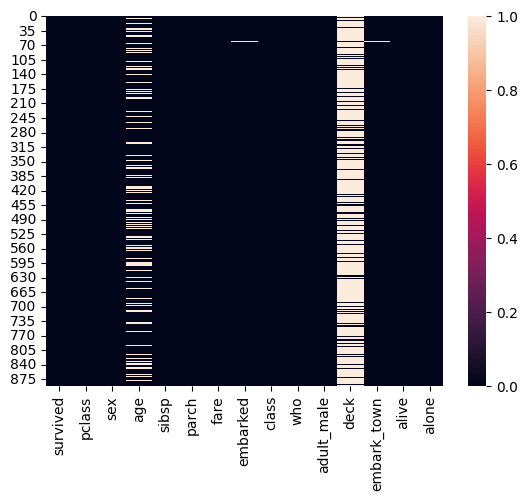

In [22]:
sns.heatmap(df.isnull())

In [21]:
# df의 'age' 컬럼에 대해 결측치인 정보를 가져와 출력해 보세요.  (basic indexing, loc 사용)
#df.loc[df['age'].isna(), :]
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


## 결측치 채우기 - fillna()

`fillna()`를 활용하면 결측치에 대하여 **일괄적으로 값을 채울 수** 있습니다.

In [23]:
# 원본을 copy하여 df1 이름 붙이기
df1 = df.copy()

In [24]:
df1['age'].tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, dtype: float64

888번 index의 **결측치가 700으로 채워**진 것을 확인할 수 있습니다.

In [25]:
# df1의 'age' 컬럼의 결측치를 700으로 채우기하여, 마지막 5개 데이터를 출력해 봅니다.
df1['age'].fillna(700).tail(5)

886     27.0
887     19.0
888    700.0
889     26.0
890     32.0
Name: age, dtype: float64

In [26]:
# df1의 'age' 컬럼을 결측치가 700으로 채워진 내용으로 갱신합니다.
df1['age'] = df1['age'].fillna(700)

In [27]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,700.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


**카테고리 형 데이터**을 채워주기 위해서는 다음과 같은 과정을 거쳐야 합니다.

이미 카테고리가 추가된 'A'나 'B'는 바로 fillna() 할 수 있습니다.

In [29]:
df1['deck'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False)

In [30]:
# df1의 'deck' 컬럼의 결측치를 'A'로 채우기합니다.  (갱신은 하지 않음)
df1['deck'].fillna('A').head()

0    A
1    C
2    A
3    C
4    A
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

하지만, 없는 카테고리로 채워주고자 할 때는 먼저 `cat.add_categories`로 카테고리를 추가한 후 채워야 합니다.

In [35]:
# cat은 category의 지정자
# add_categories (카테고리 추가)
# df1의 'deck'의 cat.add_categories()를 사용하여 'No Data'라는 카테고리를 추가하고
# 결측치를 'No Data'로 채우기 합니다.
df1['deck'] = df1['deck'].cat.add_categories('No Data')
df1['deck'].fillna('No Data').head(5)

0    No Data
1          C
2    No Data
3          C
4    No Data
Name: deck, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'No Data']

## 통계값으로 채우기

In [36]:
df1 = df.copy()

In [37]:
df1['age'].tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, dtype: float64

### 평균으로 채우기

In [38]:
# df1의 'age'의 결측치를 df1의 'age' 평균값으로 채우기 하고, 마지막 5개의 데이터를 확인합니다.
age_mean = df1['age'].mean()
df1['age'].fillna(age_mean).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, dtype: float64

In [51]:
from scipy import stats

def statistical_test(mode, df, cat, target):
    uniques= df[cat].unique()    
    if mode == 't':
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.ttest_ind(*samples)        
    elif mode == 'f':
        group = df.groupby(cat)[target]
        #print(cat, target, uniques)
        samples = [group.get_group(i) for i in uniques]
        #print(samples)
        value, p = stats.f_oneway(*samples)
    elif mode == 'c':
        contingency = pd.crosstab(index=df[cat], columns=df[target])
        value, p, df, expected = stats.chi2_contingency(contingency)
        
    return value, p, 'Statistically Signifcant' if p<=0.05 else 'Statistically Insignifcant'

In [52]:
# 'age'가 'who'별로 차이가 있다고 할 수 있는가? => 있다!
statistical_test('f', df.dropna(), 'who', 'age')

(44.221054401169845, 2.473319620510907e-16, 'Statistically Signifcant')

In [53]:
# 'age'가 'pclass'별로 차이가 있다고 할 수 있는가? => 있다!
statistical_test('f', df.dropna(), 'pclass', 'age')

(9.650000210498485, 0.0001047039989116775, 'Statistically Signifcant')

In [39]:
df.groupby('who')[['age']].mean()

,age
who,
child,6.369518
man,33.173123
woman,32.000000


In [43]:
df.groupby(['pclass', 'who'])[['age']].mean()

age
pclass who             
1      child   7.820000
       man    42.382653
       woman  35.500000
2      child   4.543684
       man    33.588889
       woman  32.179688
3      child   6.817586
       man    28.995556
       woman  27.854167

In [42]:
df.loc[df['age'].notna(), ['age', 'who']].nunique()

age    88
who     3
dtype: int64

In [41]:
df.loc[df['age'].isna(), ['age', 'who']].nunique()

age    0
who    2
dtype: int64

In [54]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [61]:
# 'age'의 결측치를 'who'별 'age'평균으로 채우기
A = df.copy()
cond_man = (A['who']=='man')
cond_woman = (A['who']=='woman')
cond_isna = A['age'].isna()
man_age_mean = A.loc[cond_man, 'age'].mean()
woman_age_mean = A.loc[cond_woman, 'age'].mean()
A.loc[cond_man & cond_isna,'age'] = man_age_mean
A.loc[cond_woman & cond_isna,'age'] = woman_age_mean
A.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,32.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [59]:
# 'age'의 결측치를 'who'별 'age'평균으로 채우기
A = pd.DataFrame()
A['who'] = df['who']
A['age'] = df['age']
A['age_mean_by_who'] = df.groupby('who')['age'].transform('mean')
A['age'] = A['age'].where(A['age'].notnull(), A['age_mean_by_who'])
A.tail()

,who,age,age_mean_by_who
886,man,27.0,33.173123
887,woman,19.0,32.000000
888,woman,32.0,32.000000
889,man,26.0,33.173123
890,man,32.0,33.173123


In [55]:
df.groupby('who')['age'].transform('mean')

0      33.173123
1      32.000000
2      32.000000
3      32.000000
4      33.173123
         ...    
886    33.173123
887    32.000000
888    32.000000
889    33.173123
890    33.173123
Name: age, Length: 891, dtype: float64

### 중앙값으로 채우기

In [63]:
# df1의 'age'의 결측치를 df1의 'age' 중앙값으로 채우기 하고, 마지막 5개의 데이터를 확인합니다.
age_median = df1['age'].median()
df1['age'].fillna(age_median).tail(5)

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, dtype: float64

### 최빈값으로 채우기

In [ ]:
# df1의 'deck'에 대한 최빈값을 구해 봅니다.  (mode() 메서드 사용)
age_mode = df1['age'].mode()
df1['age'].fillna(age_mode[0]).tail(5)

**최빈값(mode)**으로 채울 때에는 반드시 **0번째 index 지정**하여 값을 추출한 후 채워야 합니다.

In [67]:
# 최빈값에서 가장 처음에 있는 값을 출력해 봅니다. (indexing 사용)
df1['deck'].mode()[0]

'C'

In [68]:
# df1의 'deck'에 대해서 결측치를 최빈값으로 채우기하고, 마지막 5개의 데이터를 출력해 봅니다.
deck_mode = df1['deck'].mode()[0]
df1['deck'].fillna(deck_mode).tail(5)

886    C
887    B
888    C
889    C
890    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [70]:
A = pd.DataFrame()
A['org'] = pd.Series([np.nan, 1, 2, np.nan, np.nan, 3, 4])
A['bfill'] = A['org'].fillna(method='bfill')
A['ffill'] = A['org'].fillna(method='ffill')
A

,org,bfill,ffill
0,NaN,1.0,NaN
1,1.0,1.0,1.0
2,2.0,2.0,2.0
3,NaN,3.0,2.0
4,NaN,3.0,2.0
5,3.0,3.0,3.0
6,4.0,4.0,4.0


## NaN 값이 있는 데이터 제거하기 (dropna)

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [71]:
df1 = df.copy()

In [78]:
# 컬럼의 내용이 모두 결측치 인 것 삭제
df1.dropna(axis=1, how='all')

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [72]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


`dropna()`로 **1개 라도 NaN 값이 있는 행**은 제거할 수 있스빈다. (`how='any'`)

In [76]:
s = pd.Series([True, False, True, False])
s.all()

False

In [74]:
# df1에서 1개 라도 NaN 값이 있는 행을 제거합니다.
df1.dropna(axis=0, how='any')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


기본 옵션 값은 `how=any`로 설정되어 있으며, 다음과 같이 변경할 수 있습니다.

- **any**: 1개 라도 NaN값이 존재시 drop
- **all**: 모두 NaN값이 존재시 drop

In [77]:
# df1에서 모든 값이 결측치인 행을 제거합니다. (how='all' 사용)
df1.dropna(how='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 연습문제

data폴더에 있는 mySUNI_1.csv를 읽어 df에 저장하세요.

In [ ]:
#  데이터 다운로드
cds.download_data(['서울시대중교통', '서울시주민등록인구', 'PandasFileIO'])

In [83]:
# 코드를 입력하세요.
df = pd.read_csv('data/mySUNI_1.csv')
df.head(3)

,지역,GS칼텍스_셀프,GS칼텍스_일반,S-OIL_셀프,S-OIL_일반,SK에너지_셀프,SK에너지_일반,알뜰(ex)_셀프,알뜰주유소_셀프,알뜰주유소_일반,자가상표_셀프,자가상표_일반,현대오일뱅크_셀프,현대오일뱅크_일반
0,서울 강남구,1479.628286,1647.372500,1459.241304,1641.747917,1452.455417,1790.737444,NaN,NaN,NaN,NaN,NaN,1408.822500,1604.995806
1,서울 강동구,1451.558750,1472.213056,1456.763333,1528.702500,1457.974359,1666.781667,NaN,NaN,NaN,NaN,NaN,1412.656667,1441.861667
2,서울 강북구,1342.991667,1373.801667,1325.855000,1370.877500,1375.390244,1347.262500,NaN,NaN,NaN,NaN,NaN,1353.985814,NaN


각 열별 결측치의 개수를 조회하세요.

In [84]:
# 코드를 입력하세요.
df.isna().sum()

지역            0
GS칼텍스_셀프      5
GS칼텍스_일반      1
S-OIL_셀프      5
S-OIL_일반      5
SK에너지_셀프      4
SK에너지_일반      1
알뜰(ex)_셀프    24
알뜰주유소_셀프     20
알뜰주유소_일반     18
자가상표_셀프      24
자가상표_일반      23
현대오일뱅크_셀프     4
현대오일뱅크_일반     1
dtype: int64

각 행별 결측치의 개수를 조회하세요.

In [86]:
# 코드를 입력하세요.
df.isna().sum(axis=1)

0      5
1      5
2      6
3      4
4      4
5      5
6      5
7      5
8      7
9      5
10     5
11     6
12     6
13     5
14     4
15     4
16     4
17     5
18     5
19     4
20    10
21     4
22     8
23     8
24     6
dtype: int64

전체 NA 개수를 계산하세요.

In [87]:
# 코드를 입력하세요.
df.isna().sum().sum()

135

각 열별 결측치의 평균(비율)을 계산하세요.

In [93]:
s = pd.Series([1,1,1,1,0,0,0,0,0,0])
s.mean()  # 1의 비율

0.4

In [92]:
# 코드를 입력하세요.
df.isna().mean()

지역           0.00
GS칼텍스_셀프     0.20
GS칼텍스_일반     0.04
S-OIL_셀프     0.20
S-OIL_일반     0.20
SK에너지_셀프     0.16
SK에너지_일반     0.04
알뜰(ex)_셀프    0.96
알뜰주유소_셀프     0.80
알뜰주유소_일반     0.72
자가상표_셀프      0.96
자가상표_일반      0.92
현대오일뱅크_셀프    0.16
현대오일뱅크_일반    0.04
dtype: float64

데이터의 개수가 15개 미만인 컬럼을 제거 후 다시 df 변수에 저장하세요.
- 의미 : 결측치 비율이 0.6 이상인 컬럼 제거

In [94]:
25*0.6

15.0

In [96]:
# 코드를 입력하세요.
A = df.dropna(axis=1, thresh=len(df)*0.6)
A.columns

Index(['지역', 'GS칼텍스_셀프', 'GS칼텍스_일반', 'S-OIL_셀프', 'S-OIL_일반', 'SK에너지_셀프',
       'SK에너지_일반', '현대오일뱅크_셀프', '현대오일뱅크_일반'],
      dtype='object')

결측치를 0으로 대체하세요.

In [98]:
# 코드를 입력하세요.
A = df.fillna(0)
A.isna().sum().sum()

0